<a href="https://colab.research.google.com/github/Muhab2001/pneumonia-xray-classification/blob/main/coe292_src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Before Running the code❗❗**

Use the free GPU acceleration offered by google colab to decrease model training time, follow the steps:

- from the options below the filename click on ***Runtime***
- from the dropdown select ***Change Runtime Type***
- under ***Hardware Accelerator*** select ***GPU***
- click ***Save***


In [ ]:
 ! pip install  -q kaggle

In [ ]:
!pip install git+https://github.com/fastai/fastai

  Cloning https://github.com/fastai/fastai to /tmp/pip-req-build-zpdp7h5u
  Running command git clone -q https://github.com/fastai/fastai /tmp/pip-req-build-zpdp7h5u
     |████████████████████████████████| 56 kB 2.5 MB/s 
  Created wheel for fastai: filename=fastai-2.5.4-py3-none-any.whl size=187080 sha256=188ed99c48c915c822754b42805dcbbb2488b08300aada89240c1e85423006dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ykw2b8p/wheels/40/be/4f/b7f2aec4df5712626ceed9f20a8996eb05e31244e57e58d632
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import  *; 

In [ ]:
import fastai
fastai.__version__

'2.5.4'

In [ ]:
from fastai.imports import * 

In [ ]:
torch.backends.cudnn.enabled

True

In [ ]:
torch.cuda.is_available()

True

In [ ]:
resnet50  

<function torchvision.models.resnet.resnet50>

In [ ]:

from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhababubaker","key":"6ec3034bc66a46d179f238bdac943a8c"}'}

# **Before proceeding after this step above ❗❗**

1. create a kaggle account on [kaggle.com](https://www.kaggle.com/)
2. click on your profile image > select **Your profile**
3. Select ***Account*** from the tabs
4. scroll down to the section named ***API***
5. click ***Expire API Token***, and then click ***Create New API Token***
6. you will get a file downloaded named ***kaggle.json***
7. upload this file in the cell above
8. Continue running the following cells to see the results


In [ ]:

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17242  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10428  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4835  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3777  
promptcloud/car

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia -p /content/sample_data/ --unzip 

100% 2.29G/2.29G [00:28<00:00, 42.7MB/s]
100% 2.29G/2.29G [00:28<00:00, 86.8MB/s]


In [ ]:
!cp -a /content/sample_data/chest_xray/train/PNEUMONIA/. /content/sample_data/chest_xray/train/NORMAL
!cp -a /content/sample_data/chest_xray/test/PNEUMONIA/. /content/sample_data/chest_xray/train/NORMAL
!cp -a /content/sample_data/chest_xray/test/NORMAL/. /content/sample_data/chest_xray/train/NORMAL
!cp -a /content/sample_data/chest_xray/val/PNEUMONIA/. /content/sample_data/chest_xray/train/NORMAL
!cp -a /content/sample_data/chest_xray/val/NORMAL/. /content/sample_data/chest_xray/train/NORMAL

In [ ]:

def penumoniaLabels(x):
  if(x.startswith("IM") or x.startswith("NORMAL")):
    return "normal"
  else:
    return '_'.join(x.split('_')[:-1]).split("_")[1] 


In [ ]:
path = "/content/sample_data/chest_xray/train/NORMAL" 
fnamesA = get_image_files(path=path) 

dls1 = ImageDataLoaders.from_name_func(path, fnamesA, label_func=penumoniaLabels, batch_tfms=[Resize(224, method="squish"), Saturation(max_lighting=0)], item_tfms= Resize(224, method ="squish"), valid_pct=0.3)


In [ ]:
dls1.vocab

['bacteria', 'normal', 'virus']

In [ ]:
fastai.torch_core.defaults.device = 'cuda:0' 
torch.cuda.empty_cache()
learn = cnn_learner(dls1, resnet50, metrics= [error_rate, accuracy], ) 
# learn.fine_tune(1) ## training on 1 epoch only

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

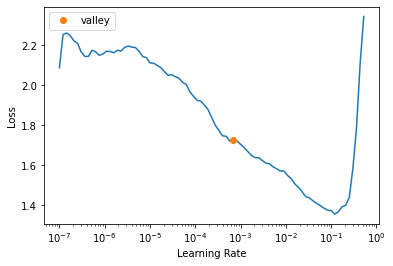

In [ ]:
torch.cuda.empty_cache()
learn.lr_find()

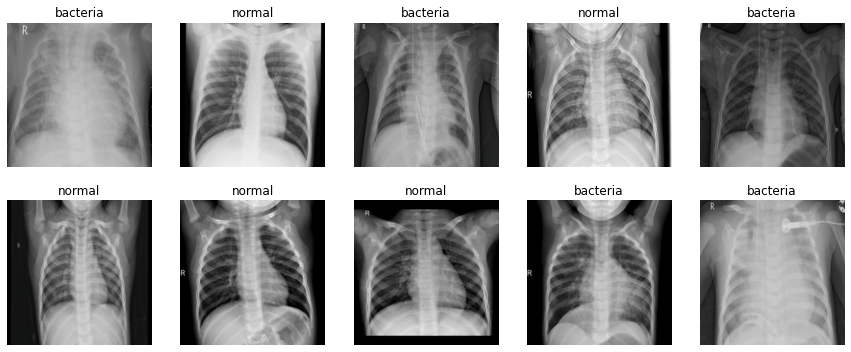

In [ ]:
dls1.show_batch( max_n=10, nrows=2)

In [ ]:
learn.fine_tune(4
              , 0.0006918309954926372)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.007215,1.169889,0.179954,0.820046,02:35


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.005520,1.382985,0.196469,0.803531,02:41
1,0.041244,1.380479,0.194761,0.805239,02:40
2,0.025877,1.144275,0.176538,0.823462,02:42
3,0.013460,1.146892,0.174829,0.825171,02:42


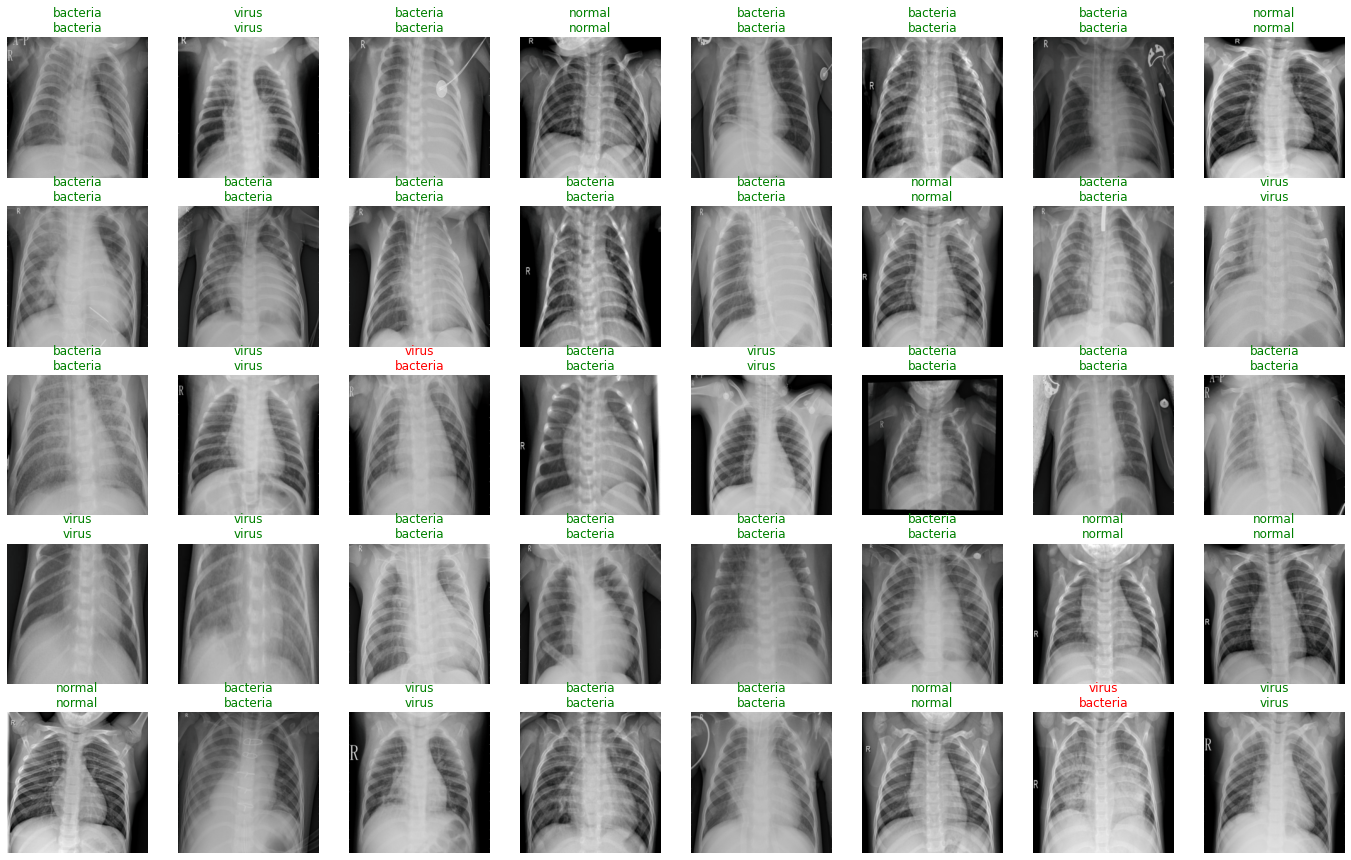

In [ ]:
learn.show_results(max_n=40, nrows=5) 

In [ ]:
# 2-way classification
def penumoniaLabels(x):
  if(x.startswith("IM") or x.startswith("NORMAL")):
    return "normal"
  else:
    return "pneumonia" 


In [ ]:
path = "/content/sample_data/chest_xray/train/NORMAL" 
fnamesA = get_image_files(path=path) 

dls1 = ImageDataLoaders.from_name_func(path, fnamesA, label_func=penumoniaLabels, batch_tfms=[Resize(224, method="squish"), Saturation(max_lighting=0)], item_tfms= Resize(224, method ="squish"), valid_pct=0.3)


In [ ]:
dls1.vocab

['normal', 'pneumonia']

In [ ]:
fastai.torch_core.defaults.device = 'cuda:0' 
torch.cuda.empty_cache()
learn = cnn_learner(dls1, resnet50, metrics= [error_rate, accuracy], ) 
# learn.fine_tune(1) ## training on 1 epoch only

SuggestedLRs(valley=0.0005754399462603033)

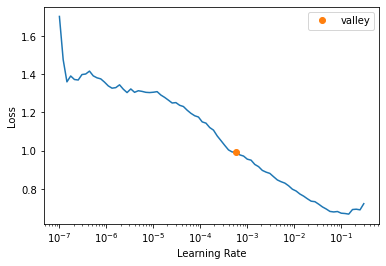

In [ ]:
torch.cuda.empty_cache()
learn.lr_find()

In [ ]:
learn.fine_tune(4
              ,0.0005754399462603033)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003435,0.213316,0.038155,0.961845,02:31


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003204,0.279120,0.046697,0.953303,02:41
1,0.022246,0.306069,0.039294,0.960706,02:41
2,0.018478,0.248877,0.035308,0.964692,02:41
3,0.009882,0.221092,0.034738,0.965262,02:44
